## Data Clustering of Tumor Data

### Clustering with K-means clustering

In [95]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
import os
%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans
from subprocess import check_output
current_working_directory = os.getcwd()
print(f"current working directory: {current_working_directory}")
#
print(check_output(["ls", "data"]).decode("utf8"))


current working directory: /home/michellewli/quantum_programming_project/clustering_tumor_data
data.csv
data.csv:Zone.Identifier
data2.csv
data2.csv:Zone.Identifier



In [96]:
# Read the data file
data = pd.read_csv('data/data2.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,84862001,M,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420
1,849014,M,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,...,27.32,30.88,186.80,2398.0,0.1512,0.3150,0.53720,0.23880,0.2768,0.07615
2,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259
3,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183
4,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,...,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773


In [97]:
# Cleaning and modifying the data
data = data.drop('id', axis=1, errors='ignore')

#data = data.drop('Unnamed: 32',axis=1)
# Mapping Benign to 0 and Malignant to 1 
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
# Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
datas.columns = list(data.iloc[:,1:32].columns)
datas['diagnosis'] = data['diagnosis']
# Creating the high dimensional feature space X
data_drop = datas.drop('diagnosis',axis=1)
X = data_drop.values

#Creating a 2D visualization to visualize the clusters
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=3, n_iter= 4000)
Y = tsne.fit_transform(X)

[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 2.940703
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.540977


/home/michellewli/quantum_programming_project/clustering_tumor_cells/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] KL divergence after 950 iterations: 0.046857


[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 2.940703


/home/michellewli/quantum_programming_project/clustering_tumor_cells/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.540985
[t-SNE] KL divergence after 500 iterations: 0.049253


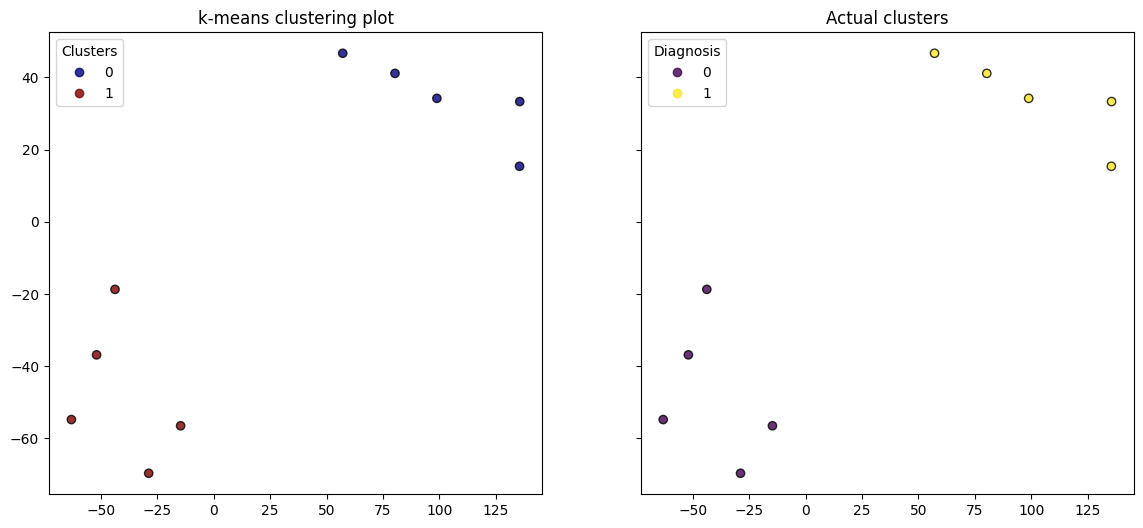

In [98]:
# Updated t-SNE with fewer iterations to avoid timeout
tsne = TSNE(verbose=1, perplexity=3, n_iter=500)
Y = tsne.fit_transform(X)

# Cluster using k-means
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, algorithm='elkan')
kY = kmeans.fit_predict(X)

# Plotting the clusters
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot k-means clustering results
scatter1 = ax1.scatter(Y[:, 0], Y[:, 1], c=kY, cmap="jet", edgecolor="k", alpha=0.8)
ax1.set_title('k-means clustering plot')
ax1.legend(*scatter1.legend_elements(), title="Clusters")

# Plot actual diagnosis clusters
scatter2 = ax2.scatter(Y[:, 0], Y[:, 1], c=datas['diagnosis'], cmap="viridis", edgecolor="k", alpha=0.8)
ax2.set_title('Actual clusters')
ax2.legend(*scatter2.legend_elements(), title="Diagnosis")

plt.show()


Text(0.5, 1.0, 'Actual clusters')

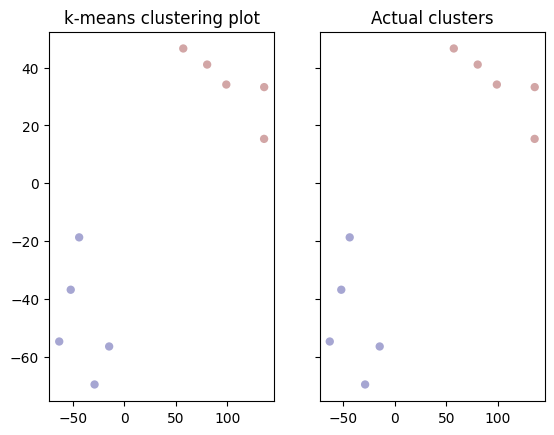

In [99]:
#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='elkan')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')


Text(0.5, 1.0, 'Actual clusters')

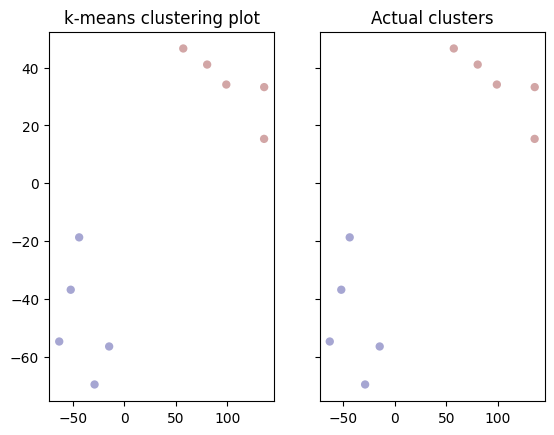

In [100]:
#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

In [101]:
# Separate the 'id' column for later use and remove it from the features used in clustering
data = pd.read_csv('data/data2.csv')
data = data.drop(columns=['Unnamed: 32'], errors='ignore')
#data.head()
ids = data.columns


# Cluster using k-means
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='elkan')
kY = kmns.fit_predict(X)
print(kY)

[1 1 0 0 0 1 1 0 0 1]


In [102]:
# Map k-means cluster labels to "benign" and "malignant" based on majority label in each cluster
# Assuming 'data' contains the actual 'diagnosis' labels for comparison

data['kmeans_cluster'] = kY
cluster_mapping = {}

# Determine which cluster corresponds to "benign" and "malignant"
for cluster in range(2):
    # Get actual diagnosis labels for samples in this cluster
    diagnosis_in_cluster = data[data['kmeans_cluster'] == cluster]['diagnosis']
    
    # Determine the majority class in this cluster (benign or malignant)
    majority_label = diagnosis_in_cluster.value_counts().idxmax()
    cluster_mapping[cluster] = majority_label

# Apply mapping to k-means predictions
data['classical diagnosis'] = data['kmeans_cluster'].map(cluster_mapping)
#data.to_csv('dataKY.csv', index=False)

# Save the classified dataset with tumor ID and benign/malignant labels based on k-means clustering
data[['id', 'classical diagnosis']].to_csv('classical_clusters.csv', index=False)
print("Classified clusters saved to classical_clusters.csv")

# Load the CSV file and display its first few rows
classified_clusters = pd.read_csv('classical_clusters.csv')
print(classified_clusters.head())

Classified clusters saved to classical_clusters.csv
         id classical diagnosis
0  84862001                   M
1    849014                   M
2   8510426                   B
3   8510653                   B
4   8510824                   B


### Clustering using QAOA

In [103]:
# Save the t-SNE coordinates into a CSV file
coordinates_df = pd.DataFrame(Y, columns=['x', 'y'])
coordinates_df.to_csv('tsne_coordinates.csv', index=False)

# Display the first few rows of the CSV file
saved_coordinates = pd.read_csv('tsne_coordinates.csv')
print(saved_coordinates.head())


            x          y
0   80.288810  41.079205
1  135.553180  33.276436
2  -51.907330 -36.854520
3  -63.061893 -54.773075
4  -43.739220 -18.726435


In [104]:
import pandas as pd
import numpy as np

# Load the coordinates from the CSV file
coordinates_df = pd.read_csv('tsne_coordinates.csv')
x_coords = coordinates_df['x'].values
y_coords = coordinates_df['y'].values

# Number of data points
N = len(x_coords)

# Initialize an adjacency matrix W with zeros
W = np.zeros((N, N))

# Calculate the Euclidean distances between all pairs of points
for i in range(N):
    for j in range(N):
        W[i, j] = np.sqrt((x_coords[i] - x_coords[j])**2 + (y_coords[i] - y_coords[j])**2)

# Display the adjacency matrix
print("Adjacency Matrix W:")
print(W)


Adjacency Matrix W:
[[  0.          55.81248781 153.45841431 172.44443636 137.69410591
   23.80628822  60.87939744 155.44276005 136.15359005  19.81030739]
 [ 55.81248781   0.         200.14942868 217.25713708 186.68171654
   79.54231631  17.92142862 193.92828484 175.00383788  36.71070692]
 [153.45841431 200.14942868   0.          21.1068446   19.88329668
  137.34665893 194.51171894  40.10822186  42.09369598 166.65073381]
 [172.44443636 217.25713708  21.1068446    0.          40.89897245
  157.27303775 210.5504694   37.3407395   48.41821018 184.73338672]
 [137.69410591 186.68171654  19.88329668  40.89897245   0.
  120.21063921 182.41778719  53.06174853  47.65394736 152.08573787]
 [ 23.80628822  79.54231631 137.34665893 157.27303775 120.21063921
    0.          84.34302028 144.60751497 125.67675623  43.53806374]
 [ 60.87939744  17.92142862 194.51171894 210.5504694  182.41778719
   84.34302028   0.         184.96463163 166.44522714  41.1622077 ]
 [155.44276005 193.92828484  40.10822186  3

In [105]:
import numpy as np
import pandas as pd
import rustworkx as rx
import matplotlib.pyplot as plt

# Load t-SNE coordinates from CSV
data = pd.read_csv("tsne_coordinates.csv")

# Initialize graph
graph_n = rx.PyGraph()

# Add each data point as a node
for index, row in data.iterrows():
    graph_n.add_node((row['x'], row['y']))

# Calculate all pairwise distances and store in a list
edges = []
for i in range(len(data)):
    for j in range(i + 1, len(data)):
        x1, y1 = data.iloc[i]['x'], data.iloc[i]['y']
        x2, y2 = data.iloc[j]['x'], data.iloc[j]['y']
        distance = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        edges.append((i, j, distance))  # Append (node1, node2, weight)

# Sort edges by weight in descending order
edges_sorted = sorted(edges, key=lambda x: x[2], reverse=True)

# Select the top `n` edges where `n` is the number of nodes
n = 2 * len(data)
selected_edges = edges_sorted[:n]

# Add the selected edges to the graph with weights
graph_n.add_edges_from([(e[0], e[1], e[2]) for e in selected_edges])

# Display the number of nodes and edges for verification
print(f"Graph has {graph_n.num_nodes()} nodes and {graph_n.num_edges()} edges.")


Graph has 10 nodes and 20 edges.


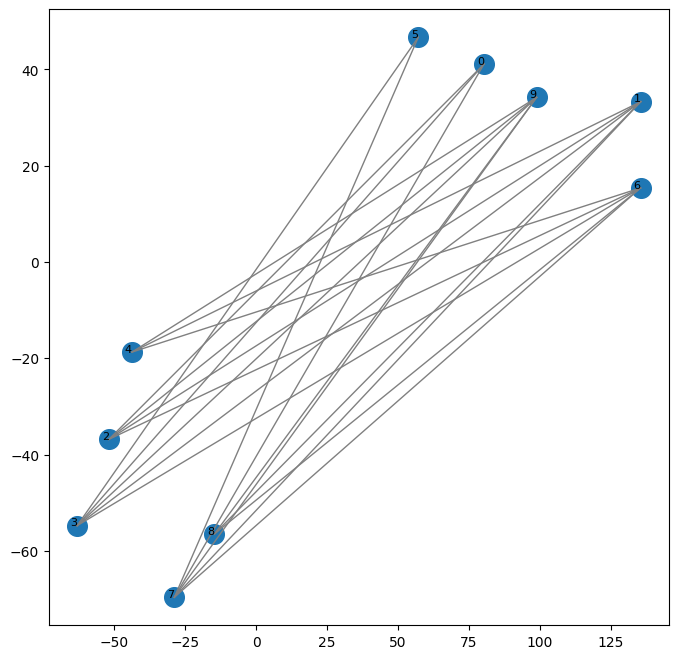

In [106]:
# Function to draw the graph
def draw_graph(graph, node_size=200, with_labels=True, width=1):
    pos = {i: (node[0], node[1]) for i, node in enumerate(graph.nodes())}
    plt.figure(figsize=(8, 8))

    # Draw nodes
    x_coords = [pos[i][0] for i in pos]
    y_coords = [pos[i][1] for i in pos]
    plt.scatter(x_coords, y_coords, s=node_size)

    # Draw edges
    for edge in graph.edge_list():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        plt.plot([x0, x1], [y0, y1], 'gray', lw=width)

    if with_labels:
        for i, (x, y) in pos.items():
            plt.text(x, y, str(i), fontsize=8, ha='right')

    plt.show()

# Call the draw function
draw_graph(graph_n)


In [107]:
from qiskit.quantum_info import SparsePauliOp

# Function to convert the graph into a list of Pauli operators for max-cut
def build_max_cut_paulis(graph: rx.PyGraph) -> list[tuple[str, float]]:
    pauli_list = []
    for edge in graph.edge_list():
        paulis = ["I"] * len(graph)
        paulis[edge[0]], paulis[edge[1]] = "Z", "Z"
        weight = graph.get_edge_data(edge[0], edge[1])
        pauli_list.append(("".join(paulis)[::-1], weight))
    return pauli_list

# Generate the max-cut Pauli operators
max_cut_paulis = build_max_cut_paulis(graph_n)

# Convert to SparsePauliOp for QAOA cost Hamiltonian
cost_hamiltonian = SparsePauliOp.from_list(max_cut_paulis)
print("Cost Function Hamiltonian (Partial):", cost_hamiltonian[:10])  # Print first 10 terms


Cost Function Hamiltonian (Partial): SparsePauliOp(['IIIIIIZIZI', 'IIIZIIZIII', 'IIIIIIIZZI', 'IIIZIIIZII', 'IIZIIIIIZI', 'IIIIIZIIZI', 'IIZZIIIIII', 'ZIIIIIZIII', 'IIIZIZIIII', 'IZIIIIIIZI'],
              coeffs=[217.25713708+0.j, 210.5504694 +0.j, 200.14942868+0.j, 194.51171894+0.j,
 193.92828484+0.j, 186.68171654+0.j, 184.96463163+0.j, 184.73338672+0.j,
 182.41778719+0.j, 175.00383788+0.j])


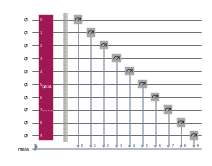

In [108]:
from qiskit.circuit.library import QAOAAnsatz

circuit_n = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=1)
circuit_n.measure_all()

circuit_n.draw('mpl', fold=False, scale=0.2, idle_wires=False)

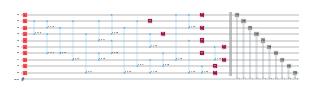

In [109]:
from qiskit import transpile
from qiskit_aer import AerSimulator
import numpy as np

# Example: Set parameter values (replace with actual values as needed)
parameter_values = {param: np.random.rand() for param in circuit_n.parameters}

# Assign the parameters directly
bound_circuit = circuit_n.assign_parameters(parameter_values)

# Set up the AerSimulator
simulator = AerSimulator(method='statevector')

# Transpile the circuit for the AerSimulator
transpiled_circuit = transpile(bound_circuit, backend=simulator, optimization_level=3)

# Run the transpiled circuit on the simulator
result = simulator.run(transpiled_circuit).result()

# Draw the transpiled circuit
transpiled_circuit.draw('mpl', fold=False, scale=0.1, idle_wires=False)


Best Solution Bitstring: 0011100110
Measurement Result Distribution:


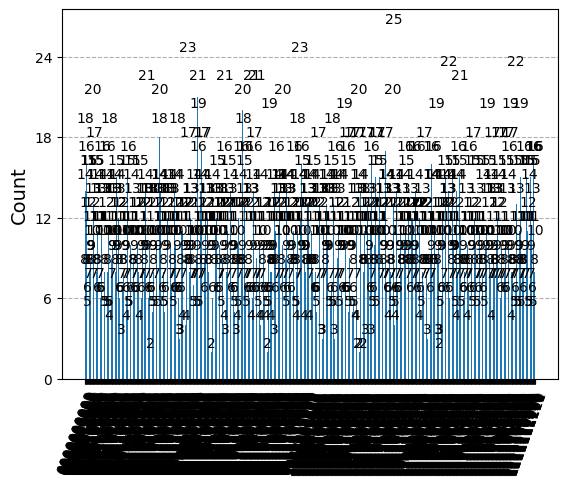

In [110]:
import numpy as np
from qiskit.circuit.library import QAOAAnsatz
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram

# Define parity array for expectation value evaluation
_PARITY = np.array([-1 if bin(i).count("1") % 2 else 1 for i in range(256)], dtype=np.complex128)

# Evaluate the expectation value of a state with respect to a given Hamiltonian
def evaluate_sparse_pauli(state: int, observable: SparsePauliOp) -> complex:
    packed_uint8 = np.packbits(observable.paulis.z, axis=1, bitorder="little")
    state_bytes = np.frombuffer(state.to_bytes(packed_uint8.shape[1], "little"), dtype=np.uint8)
    reduced = np.bitwise_xor.reduce(packed_uint8 & state_bytes, axis=1)
    return np.sum(observable.coeffs * _PARITY[reduced])

# Find the bitstring with the minimum cost
def best_solution(samples, hamiltonian):
    min_cost = float('inf')
    min_sol = None
    for bit_str in samples.keys():
        candidate_sol = int(bit_str[::-1], 2)  # Convert bitstring to integer with little-endian order
        fval = evaluate_sparse_pauli(candidate_sol, hamiltonian).real
        if fval < min_cost:
            min_cost = fval
            min_sol = candidate_sol
    return min_sol

# Set up the AerSimulator
simulator = AerSimulator(method='statevector')

# Run on the simulator
result = simulator.run(transpiled_circuit, shots=10240).result()
counts = result.get_counts()

# Find the best solution from the measurement results
best_sol_int = best_solution(counts, cost_hamiltonian)

# Convert the integer solution back to a bitstring, reversed for endianness consistency
best_sol_bitstring = format(best_sol_int, f'0{len(graph_n)}b')[::-1]

def canonical_bitstring(bitstring):
    if bitstring.count('0') > bitstring.count('1'):
        return bitstring
    else:
        return ''.join('1' if b == '0' else '0' for b in bitstring)

best_sol_bitstring = canonical_bitstring(best_sol_bitstring)


# Display the results
print("Best Solution Bitstring:", best_sol_bitstring)
print("Measurement Result Distribution:")
plot_histogram(counts)


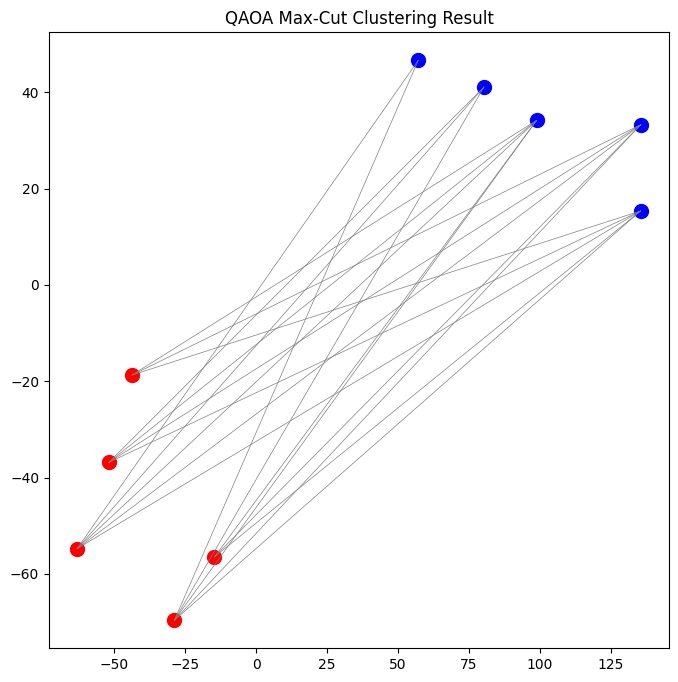

In [111]:
import matplotlib.pyplot as plt

def plot_clusters(graph, bitstring):
    pos = {i: (node[0], node[1]) for i, node in enumerate(graph.nodes())}
    plt.figure(figsize=(8, 8))
    
    # Draw nodes, color-coding based on the bitstring values
    colors = ['red' if bitstring[i] == '1' else 'blue' for i in range(len(bitstring))]
    for i, color in enumerate(colors):
        plt.scatter(*pos[i], color=color, s=100, label=f'Cluster {bitstring[i]}')

    # Draw edges
    for edge in graph.edge_list():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        plt.plot([x0, x1], [y0, y1], 'gray', lw=0.5)
    
    plt.title("QAOA Max-Cut Clustering Result")
    plt.show()

plot_clusters(graph_n, best_sol_bitstring)


In [112]:
# Function to print the 1s and 0s in the bitstring
def print_bitstring_details(bitstring):
    print("Bitstring Details:")
    for i, bit in enumerate(bitstring):
        print(f"Index: {i}, Value: {bit}")

# Assuming `best_sol_bitstring` is the bitstring you want to inspect
print_bitstring_details(best_sol_bitstring)

Bitstring Details:
Index: 0, Value: 0
Index: 1, Value: 0
Index: 2, Value: 1
Index: 3, Value: 1
Index: 4, Value: 1
Index: 5, Value: 0
Index: 6, Value: 0
Index: 7, Value: 1
Index: 8, Value: 1
Index: 9, Value: 0


In [113]:
import pandas as pd

# Load the tumor data
data = pd.read_csv('data/data2.csv')  # Adjust the path as necessary

# Check the columns in your data to identify the correct column name for IDs
print("Available columns:", data.columns)

# Replace 'id' with the correct column name for tumor IDs in your dataset
tumor_data = data[['id']]  # Adjust 'id' if necessary

# Assume `best_sol_bitstring` is the bitstring output from your QAOA code
# Replace this with your actual bitstring
bitstring = list(best_sol_bitstring)  # Convert the bitstring to a list if it's a string

# Validate the lengths
if len(bitstring) != len(tumor_data):
    raise ValueError("Length of the bitstring does not match the number of tumor IDs")

# Map the bitstring values to 'M' and 'B'
tumor_data['qaoa diagnosis'] = ['B' if bit == '0' else 'M' for bit in bitstring]

# Save the result to a CSV file
tumor_data.to_csv('qaoa_clusters.csv', index=False)

print("Saved QAOA clusters to 'qaoa_clusters.csv'")

# Load and display the saved file for confirmation
qaoa_clusters = pd.read_csv('qaoa_clusters.csv')
print("Preview of QAOA clusters:")
print(qaoa_clusters.head())

Available columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Saved QAOA clusters to 'qaoa_clusters.csv'
Preview of QAOA clusters:
         id qaoa diagnosis
0  84862001              B
1    849014              B
2   8510426              M
3   8510653              M
4   8510824              M


/tmp/ipykernel_702/4012741314.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tumor_data['qaoa diagnosis'] = ['B' if bit == '0' else 'M' for bit in bitstring]


In [114]:
def calculate_cut_value(graph, bitstring):
    cut_value = 0
    for edge in graph.edge_list():
        if bitstring[edge[0]] != bitstring[edge[1]]:  # Different clusters
            cut_value += graph.get_edge_data(edge[0], edge[1])
    return cut_value

cut_value = calculate_cut_value(graph_n, best_sol_bitstring)
print(f"Cut Value: {cut_value:.0f} out of {graph_n.num_edges()}.")


Cut Value: 3508 out of 20.


### Comparing Results 

In [115]:
import pandas as pd

# Load the real-world diagnosis data
real_data = pd.read_csv('data/data2.csv')

# Extract the id and real-world diagnosis columns
real_diagnosis = real_data[['id', 'diagnosis']]  # Adjust 'id' and 'diagnosis' if needed

# Load the two classification CSV files
classical_clusters = pd.read_csv('classical_clusters.csv')
qaoa_clusters = pd.read_csv('qaoa_clusters.csv')

# Merge the classical and QAOA classifications on 'id'
combined_clusters = pd.merge(classical_clusters, qaoa_clusters, on='id', suffixes=('_classical', '_qaoa'))

# Merge the real-world diagnosis with the combined clusters
combined_clusters = pd.merge(real_diagnosis, combined_clusters, on='id')

# Rename columns for clarity
combined_clusters.rename(
    columns={
        'diagnosis': 'real diagnosis',
        'diagnosis_classical': 'classical diagnosis',
        'diagnosis_qaoa': 'qaoa diagnosis'
    },
    inplace=True
)

# Save the final combined data to a new CSV file
combined_clusters.to_csv('final_combined_clusters.csv', index=False)

print("Final combined clusters saved to 'final_combined_clusters.csv'")

# Display the first few rows of the final combined file for confirmation
print("Preview of final combined clusters:")
print(combined_clusters.head())


Final combined clusters saved to 'final_combined_clusters.csv'
Preview of final combined clusters:
         id real diagnosis classical diagnosis qaoa diagnosis
0  84862001              M                   M              B
1    849014              M                   M              B
2   8510426              B                   B              M
3   8510653              B                   B              M
4   8510824              B                   B              M


In [116]:
import pandas as pd

# Load the combined data
combined_clusters = pd.read_csv('final_combined_clusters.csv')

# Define a function to calculate percent error
def calculate_percent_error(real_diagnosis, predicted_diagnosis):
    # Count mismatches between real and predicted diagnoses
    mismatches = sum(real_diagnosis != predicted_diagnosis)
    # Calculate percent error
    percent_error = (mismatches / len(real_diagnosis)) * 100
    return percent_error

# Calculate percent error for k-means classification
kmeans_error = calculate_percent_error(
    combined_clusters['real diagnosis'],
    combined_clusters['classical diagnosis']
)

# Calculate percent error for QAOA classification
qaoa_error = calculate_percent_error(
    combined_clusters['real diagnosis'],
    combined_clusters['qaoa diagnosis']
)

# Print the results
print(f"K-means Percent Error: {kmeans_error:.2f}%")
print(f"QAOA Percent Error: {qaoa_error:.2f}%")


K-means Percent Error: 0.00%
QAOA Percent Error: 100.00%
